# Data analysis to Identify the patterns in Los Angeles crime data

## Importing libraries:

In [3]:
!pip install plotly
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 487.6 kB/s eta 0:00:32
   ---------------------------------------- 0.2/15.6 MB 1.5 MB/s eta 0:00:11
    --------------------------------------- 0.3/15.6 MB 1.9 MB/s eta 0:00:09
   - -------------------------------------- 0.7/15.6 MB 3.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.4/15.6 MB 5.6 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/15.6 MB 6.8 MB/s eta 0:00:02
   ------- -------------------------------- 3.1/15.6 MB 8.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.3/15.6 MB 9.6 MB/s eta 0:00:02
   ---------- ----------------------------- 4.1/15.6 MB 9.4 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/15.6 MB 10.5 MB/s eta 0:00:02
   ------

In [5]:
# data processing
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import pearsonr, linregress

# data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import plotly.graph_objects as go
from branca.element import Template, MacroElement
import plotly.offline as pyo

# to interact with operating system to save files
import os
from os.path import dirname

#ignore warnings
import warnings
# warnings.filterwarnings("ignore")

## Importing Cleaned Datasets

In [6]:
df = pd.read_csv('../DataSets/cleaned_df.csv')

In [6]:
df.shape

(757141, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757141 entries, 0 to 757140
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dr_no                 757141 non-null  int64  
 1   reported_date         757141 non-null  object 
 2   crime_date            757141 non-null  object 
 3   crime_time            757141 non-null  int64  
 4   area_numerically      757141 non-null  int64  
 5   area_name             757141 non-null  object 
 6   district              757141 non-null  int64  
 7   part 1-2              757141 non-null  int64  
 8   crime_code            757141 non-null  int64  
 9   crime_code.1          757141 non-null  object 
 10  victim_age            757141 non-null  int64  
 11  victim_gender         757141 non-null  object 
 12  victim_decscent       757141 non-null  object 
 13  premis_code           757132 non-null  float64
 14  premis_description    756699 non-null  object 
 15  

In [9]:
pd.set_option("display.max.columns", None)
df.tail()

,dr_no,reported_date,crime_date,crime_time,area_numerically,area_name,district,part 1-2,crime_code,crime_code.1,victim_age,victim_gender,victim_decscent,premis_code,premis_description,weapon_code,weapon_description,status,status_description,crime_code_1,crime_code_2,location,cross_street,latitude,longitude,reported_day_of_week,crime_day_of_week,reported_day_day,reported_day_month,reported_day_year,crime_day_day,crime_day_month,crime_day_year,date_diff,crime_newtime
757136,231604807,2023-01-27,2023-01-26,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,122.0,"VEHICLE, PASSENGER/TRUCK",NaN,NaN,IC,Invest Cont,740.0,0.0,12500 BRANFORD ST Los A...,0,34.2466,-118.4054,Friday,Thursday,27,1,2023,26,1,2023,1 days,18:00
757137,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,0.0,12800 FILMORE ST Los A...,0,34.2790,-118.4116,Wednesday,Wednesday,22,3,2023,22,3,2023,0 days,10:00
757138,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,230.0,0.0,6100 S VERMONT AV Los An...,0,33.9841,-118.2915,Wednesday,Wednesday,12,4,2023,12,4,2023,0 days,16:30
757139,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),NaN,NaN,IC,Invest Cont,352.0,0.0,500 S MAIN ST Los Ang...,0,34.0467,-118.2485,Sunday,Saturday,2,7,2023,1,7,2023,1 days,00:01
757140,230906458,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,0.0,14500 HARTLAND ST Los A...,0,34.1951,-118.4487,Sunday,Sunday,5,3,2023,5,3,2023,0 days,09:00


## Exploratory Data Analysis
1. 
2. 
3. 
4. 

In [23]:
df[['reported_day_year', 'victim_gender']]

,reported_day_year,victim_gender
0,2020,F
1,2020,M
2,2020,X
3,2020,F
4,2020,X
...,...,...
757136,2023,M
757137,2023,F
757138,2023,M
757139,2023,F


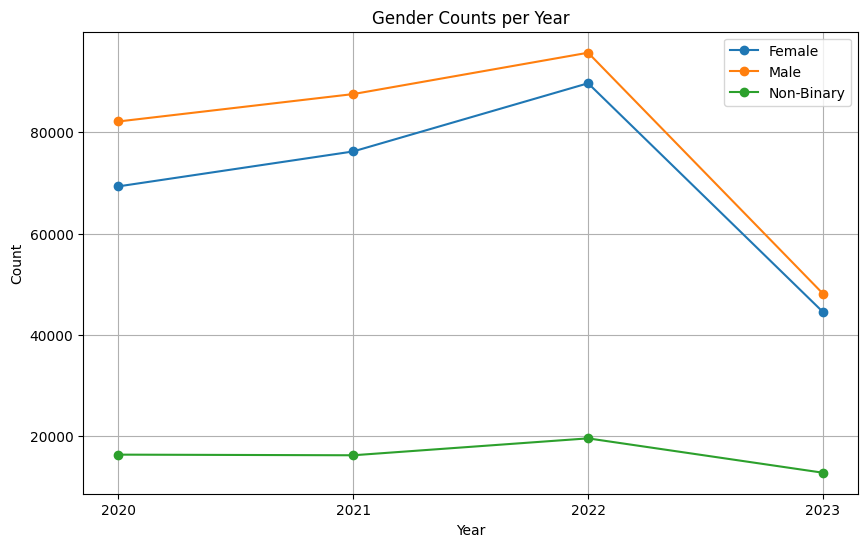

In [32]:
# Counting the gender involved in the crimes as a victim
gender_counts_per_year = df.groupby(['reported_day_year', 'victim_gender']).size().unstack(fill_value=0)
gender_counts_per_year = gender_counts_per_year.reset_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(gender_counts_per_year['reported_day_year'], gender_counts_per_year['F'], label='Female', marker='o')
plt.plot(gender_counts_per_year['reported_day_year'], gender_counts_per_year['M'], label='Male', marker='o')
plt.plot(gender_counts_per_year['reported_day_year'], gender_counts_per_year['X'], label='Non-Binary', marker='o')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Gender Counts per Year')
plt.legend()
plt.grid(True)

# Set x-axis ticks for every year
plt.xticks(gender_counts_per_year['reported_day_year'])

plt.show()


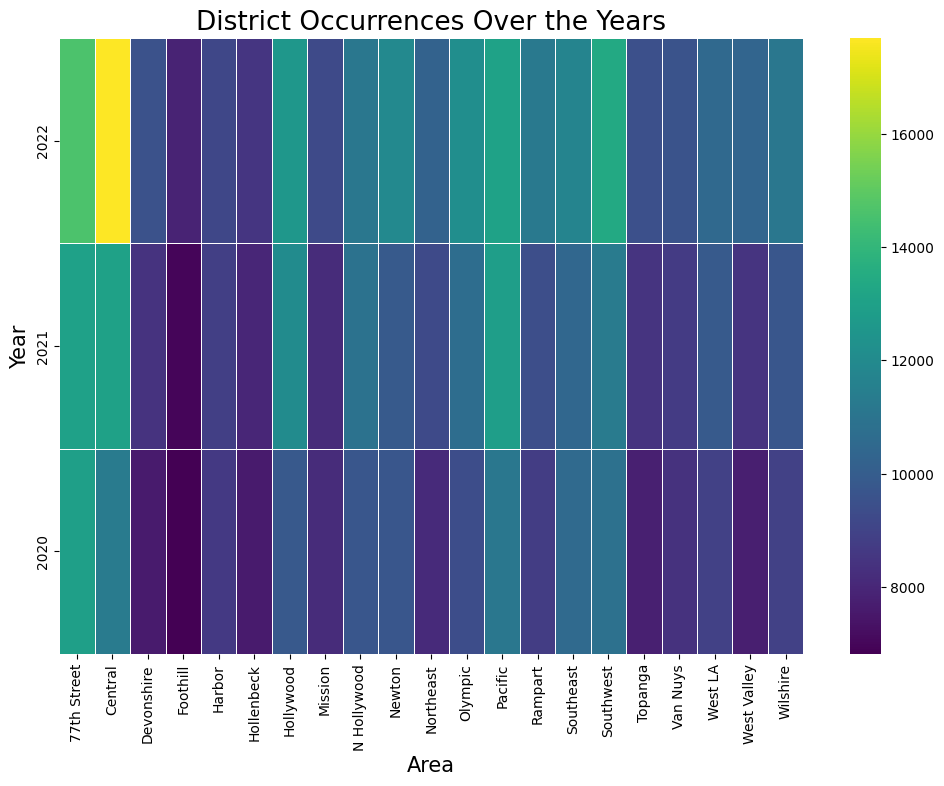

In [64]:
area_counts = df.groupby(['reported_day_year', 'area_name']).size().reset_index(name='count')
area_counts = area_counts[area_counts['reported_day_year'] != 2023]

# Create a pivot table for better visualization
pivot_table = area_counts.pivot_table(index='reported_day_year', columns='area_name', values='count', fill_value=0)
pivot_table = pivot_table.sort_values(by='reported_day_year', ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', fmt='g', linewidths=.5)
plt.title('District Occurrences Over the Years', fontsize=19)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Year',  fontsize=15)
plt.show()
